In [1]:
import openslide

img_path = 'dataset/paip/154000-2019-05-00-01-01.svs'
slides = openslide.OpenSlide(img_path)
print(slides.level_dimensions)

((61752, 44278), (15438, 11069), (3859, 2767))


In [2]:
import numpy as np
lv2 = np.array(slides.read_region(location=(0,0),level=2, size=slides.level_dimensions[2]), dtype = np.uint8)

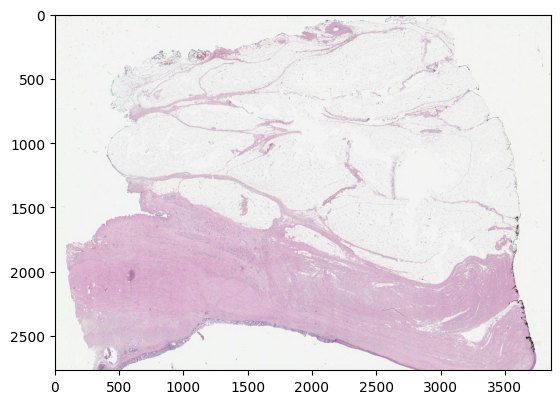

In [3]:
from matplotlib import pyplot as plt

plt.imshow(lv2)

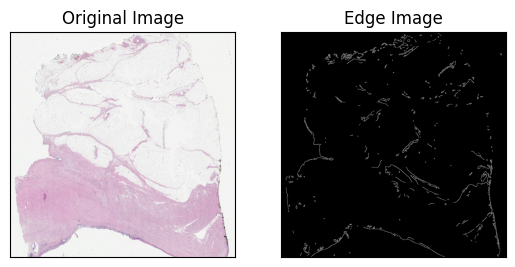

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from gvit.quadtree import QuadTree

grey_img = lv2
grey_img = res = cv.resize(grey_img, dsize=(1024, 1024), interpolation=cv.INTER_CUBIC)
grey_img = cv.GaussianBlur(grey_img, (3,3), 0)
# grey_img = cv.blur(grey_img, (2,2))
edges = cv.Canny(grey_img, 150, 300)

plt.subplot(121),plt.imshow(grey_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.savefig(fname="paip_canny.jpg")
plt.show()

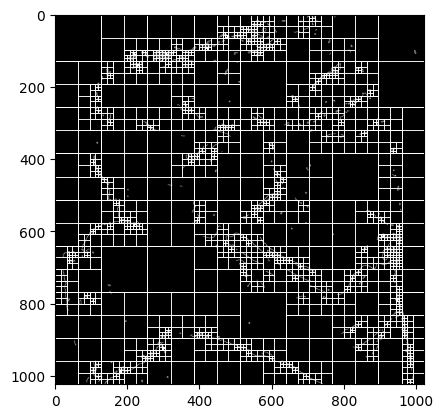

In [5]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')

qdt = QuadTree(domain=edges, max_value=24, max_depth=10)
qdt.draw(ax=ax)
plt.savefig(fname="paip_pachify.jpg")
plt.show()

In [6]:
# 4x4 => 1780 patches 36x less
# 1024/4 = 256*256 => 65536 patches  

patch_info = {}
print(qdt.count_patches(patch_info))
print(patch_info)
print(sum(patch_info.values()))

1780
{'64*64': 108, '32*32': 267, '16*16': 595, '8*8': 762, '4*4': 40, '128*128': 8}
1780


In [7]:
import numpy as np
lv1 = np.array(slides.read_region(location=(0,0),level=1, size=slides.level_dimensions[1]), dtype = np.uint8)

grey_img = lv1
grey_img = res = cv.resize(grey_img, dsize=(10240, 10240), interpolation=cv.INTER_CUBIC)


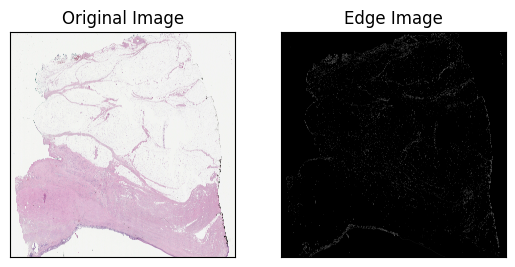

In [8]:
grey_img = cv.GaussianBlur(res, (5,5), 0)
edges = cv.Canny(grey_img, 130, 390)

plt.subplot(121),plt.imshow(grey_img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.savefig(fname="paip_canny.jpg")
plt.show()

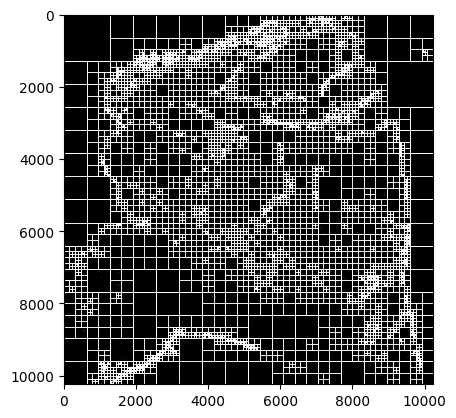

In [9]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')

qdt = QuadTree(domain=edges, max_value=384, max_depth=16)
qdt.draw(ax=ax)
plt.savefig(fname="paip_pachify.jpg")
plt.show()

In [10]:
# 8x8 => 424 patches
# 512/8 = 64*64 => 4096 patches  

patch_info = {}
print(qdt.count_patches(patch_info))
print(patch_info)
print(sum(patch_info.values()))

6298
{'640*640': 50, '160*160': 1386, '80*80': 2305, '40*40': 2261, '320*320': 266, '20*20': 28, '1280*1280': 2}
6298


svs img structure
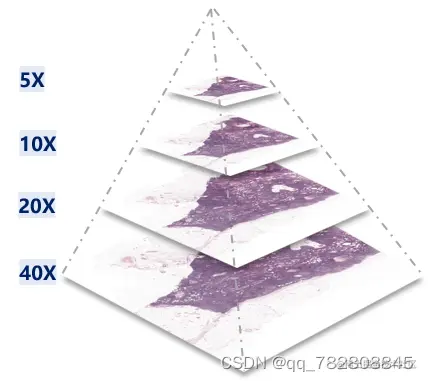